In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_classification.csv')
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

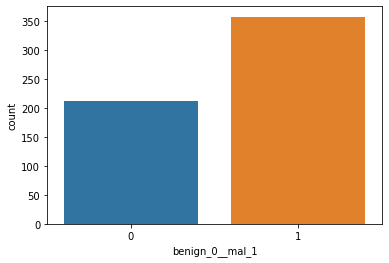

In [3]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

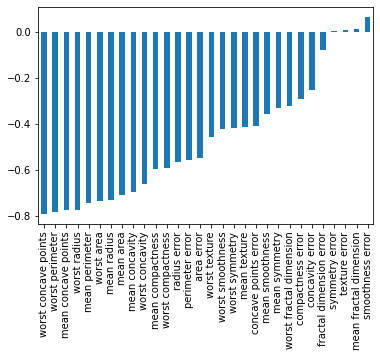

In [4]:
#see correlations
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

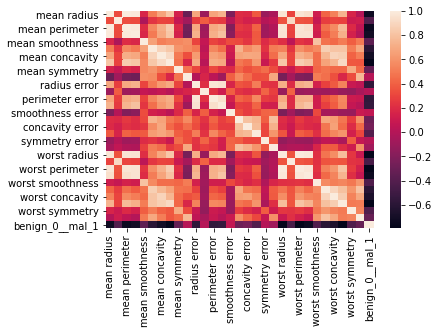

In [5]:
sns.heatmap(df.corr())

In [6]:
X = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1'].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
X_test = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
X_train.shape

(426, 30)

In [15]:
model = Sequential()


model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#binary classification
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer="adam")

In [16]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=25)

In [17]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test), verbose=0,callbacks=[early_stop])

Epoch 00144: early stopping


In [18]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

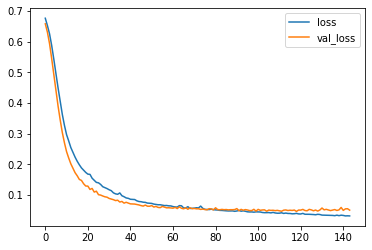

In [19]:
losses.plot()

In [22]:
#dropout layers , same example with dropout layers
model = Sequential()


model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))


#binary classification
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer="adam")
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=25)

In [23]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test), verbose=0,callbacks=[early_stop])
losses = pd.DataFrame(model.history.history)

Epoch 00159: early stopping


<AxesSubplot:>

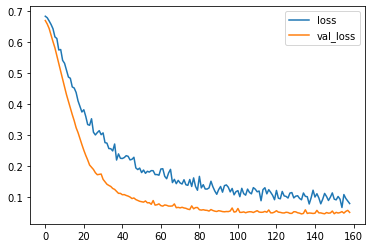

In [24]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [36]:
predictions= (model.predict(X_test) > 0.5).astype("int32")

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [39]:
print(confusion_matrix(y_test,predictions))

[[53  1]
 [ 2 87]]
